<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/NN_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 727kB 18.0MB/s 
     |████████████████████████████████| 194kB 44.5MB/s 
     |████████████████████████████████| 1.2MB 45.1MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 12.8MB 44.5MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 776.8MB 16kB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [2]:
from fastai.vision.all import *
from fastbook import *

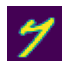

In [20]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()
(path/'train').ls()
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(three_tensors) + [0]*len(seven_tensors)).unsqueeze(1)
show_image(stacked_sevens[1]*255)

In [21]:
threes = (path/'valid'/'3').ls().sorted()
sevens = (path/'valid'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
valid_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
valid_y = tensor([1]*len(three_tensors) + [0]*len(seven_tensors)).unsqueeze(1)

In [22]:
train_dset = list(zip(train_x,train_y))
train_dl = DataLoader(train_dset, batch_size=256)
valid_dset = list(zip(train_x,train_y))
valid_dl = DataLoader(valid_dset, batch_size=256)
dls = DataLoaders(train_dl, valid_dl)

In [23]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [18]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [24]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [25]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [27]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [35]:
simple_net= nn.Sequential(
    nn.Linear(28*28,50),
    nn.ReLU(),
    nn.Linear(50,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [36]:
lr = 1
opt = BasicOptim(simple_net.parameters(), lr)

In [37]:
def train_epoch(model):
    for xb,yb in train_dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [38]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [44]:
train_model(simple_net, 20)

0.9971 0.9969 0.9971 0.997 0.9971 0.9958 0.9956 0.9967 0.9969 0.9972 0.9971 0.9968 0.9971 0.9971 0.9972 0.9972 0.9972 0.9972 0.9972 0.9972 